In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
print ("Rows: " ,customers.shape[0])
print ("Columns : " ,customers.shape[1])
print ("\nFeatures: \n" ,customers.columns.tolist())
print ("\nMissing values:  ", customers.isnull().sum().values.sum())
print ("\nUnique values:")
print (customers.nunique())

Rows:  99441
Columns :  5

Features: 
 ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']

Missing values:   0

Unique values:
customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64


In [4]:
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
print ("Rows: " ,geolocation.shape[0])
print ("Columns : " ,geolocation.shape[1])
print ("\nFeatures: \n" ,geolocation.columns.tolist())
print ("\nMissing values:  ", geolocation.isnull().sum().values.sum())
print ("\nUnique values:")
print (geolocation.nunique(), '\n')
print (geolocation[['geolocation_city','geolocation_state']].nunique(), '\n')
print (geolocation['geolocation_state'].value_counts(), '\n')

Rows:  1000163
Columns :  5

Features: 
 ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']

Missing values:   0

Unique values:
geolocation_zip_code_prefix     19015
geolocation_lat                717358
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64 

geolocation_city     8011
geolocation_state      27
dtype: int64 

SP    404268
MG    126336
RJ    121169
RS     61851
PR     57859
SC     38328
BA     36045
GO     20139
ES     16748
PE     16432
DF     12986
MT     12031
CE     11674
PA     10853
MS     10431
MA      7853
PB      5538
RN      5041
PI      4549
AL      4183
TO      3576
SE      3563
RO      3478
AM      2432
AC      1301
AP       853
RR       646
Name: geolocation_state, dtype: int64 



In [6]:
df = pd.DataFrame(geolocation['geolocation_city'].value_counts())
df.reset_index(inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                                       index  geolocation_city
0                                  sao paulo            135800
1                             rio de janeiro             62151
2                             belo horizonte             27805
3                                  são paulo             24918
4                                   curitiba             16593
5                               porto alegre             13521
6                                   salvador             11865
7                                  guarulhos             11340
8                                   brasilia             10470
9                      sao bernardo do campo              8112
10                                    osasco              7658
11                               santo andre              6863
12                                   niteroi              6534
13                                    recife              6168
14                                   goiania           

In [7]:
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


The total order_item value is: 21.33 * 3 = 63.99

The total freight value is: 15.10 * 3 = 45.30

The total order value (product + freight) is: 45.30 + 63.99 = 109.29

In [8]:
order_items[order_items['order_id']=='ffb9a9cd00c74c11c24aa30b3d78e03b']
# ver exemplo com produtos diferentes

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
112533,ffb9a9cd00c74c11c24aa30b3d78e03b,1,fec565c4e3ad965c73fb1a21bb809257,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,89.9,18.34
112534,ffb9a9cd00c74c11c24aa30b3d78e03b,2,fec565c4e3ad965c73fb1a21bb809257,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,89.9,18.34
112535,ffb9a9cd00c74c11c24aa30b3d78e03b,3,03bb06cda40712fb8473f7962fb7d198,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,129.9,18.49
112536,ffb9a9cd00c74c11c24aa30b3d78e03b,4,3321ad579f19476d0d668f726f8dffec,da8622b14eb17ae2831f4ac5b9dab84a,2017-03-22 17:20:21,219.9,22.18


In [9]:
#order_items[order_items['order_item_id']>1]

In [10]:
print ("Rows: " ,order_items.shape[0])
print ("Columns : " ,order_items.shape[1])
print ("\nFeatures: \n" ,order_items.columns.tolist())
print ("\nMissing values:  ", order_items.isnull().sum().values.sum())
print ("\nUnique values:")
print (order_items.nunique())

Rows:  112650
Columns :  7

Features: 
 ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']

Missing values:   0

Unique values:
order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64


In [11]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [12]:
order_payments[order_payments['order_id']=='00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,payment_sequential,payment_type,payment_installments,payment_value
29413,00143d0f86d6fbd9f9b38ab440ac16f5,1,credit_card,1,109.29


In [13]:
order_payments[order_payments['order_id']=='ccf804e764ed5650cd8759557269dc13'].sort_values('payment_sequential').head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
14362,ccf804e764ed5650cd8759557269dc13,1,credit_card,1,2.20
38001,ccf804e764ed5650cd8759557269dc13,2,voucher,1,1.45
40387,ccf804e764ed5650cd8759557269dc13,3,voucher,1,1.15


In [14]:
print ("Rows: " ,order_payments.shape[0])
print ("Columns : " ,order_payments.shape[1])
print ("\nFeatures: \n" ,order_payments.columns.tolist())
print ("\nMissing values:  ", order_payments.isnull().sum().values.sum())
print ("\nUnique values:")
print (order_payments.nunique())
print (order_payments['payment_type'].value_counts(), '\n')
print (order_payments['payment_installments'].value_counts(), '\n')

Rows:  103886
Columns :  5

Features: 
 ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']

Missing values:   0

Unique values:
order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64 

1     52546
2     12413
3     10461
4      7098
10     5328
5      5239
8      4268
6      3920
7      1626
9       644
12      133
15       74
18       27
11       23
24       18
20       17
13       16
14       15
17        8
16        5
21        3
0         2
23        1
22        1
Name: payment_installments, dtype: int64 



In [15]:
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [16]:
print ("Rows: " ,order_reviews.shape[0])
print ("Columns : " ,order_reviews.shape[1])
print ("\nFeatures: \n" ,order_reviews.columns.tolist())
print ("\nMissing values:  ", order_reviews.isnull().sum().values.sum())
print ("\nUnique values:")
print (order_reviews.nunique())

Rows:  100000
Columns :  7

Features: 
 ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']

Missing values:   146532

Unique values:
review_id                  99173
order_id                   99441
review_score                   5
review_comment_title        4600
review_comment_message     36921
review_creation_date         637
review_answer_timestamp    99010
dtype: int64


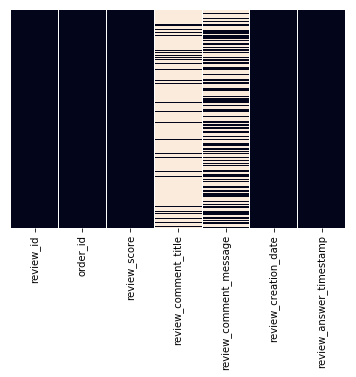

In [17]:
sns.heatmap(order_reviews.isnull(), cbar=False, yticklabels=False);

In [18]:
order_reviews[order_reviews['order_id']=='03c939fd7fd3b38f8485a0f95798f1f6']['review_comment_message']

8329     Um ponto negativo que achei foi a cobrança de ...
51931                                                  NaN
70005    Seria ótimo se tivesem entregue os 3 (três) pe...
Name: review_comment_message, dtype: object

In [19]:
orders = pd.read_csv('olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [20]:
print ("Rows: " ,orders.shape[0])
print ("Columns : " ,orders.shape[1])
print ("\nFeatures: \n" ,orders.columns.tolist())
print ("\nMissing values:  ", orders.isnull().sum().values.sum())
print ("\nUnique values:")
print (orders.nunique(), '\n')
print (orders['order_status'].value_counts(), '\n')

Rows:  99441
Columns :  8

Features: 
 ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

Missing values:   4908

Unique values:
order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64 

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64 



In [21]:
orders[orders['customer_id']=='8ab97904e6daea8866dbdbc4fb7aad2c']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


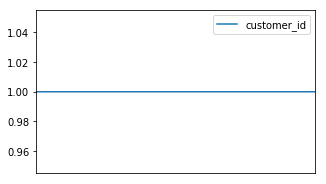

In [22]:
fig, ax = plt.subplots(figsize=(5, 3))

df = orders['customer_id'].value_counts().to_frame()
df.plot(ax=ax, xticks=[]);

In [23]:
products = pd.read_csv('olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


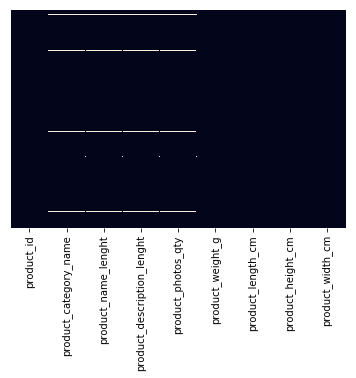

In [24]:
sns.heatmap(products.isnull(), cbar=False, yticklabels=False);

In [25]:
print ("Rows: " ,products.shape[0])
print ("Columns : " ,products.shape[1])
print ("\nFeatures: \n" ,products.columns.tolist())
print ("\nMissing values:  ", products.isnull().sum().values.sum())
print ("\nUnique values:")
print (products.nunique(), '\n')

Rows:  32951
Columns :  9

Features: 
 ['product_id', 'product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty', 'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

Missing values:   2448

Unique values:
product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64 



In [26]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(products['product_category_name'].value_counts())

cama_mesa_banho                                   3029
esporte_lazer                                     2867
moveis_decoracao                                  2657
beleza_saude                                      2444
utilidades_domesticas                             2335
automotivo                                        1900
informatica_acessorios                            1639
brinquedos                                        1411
relogios_presentes                                1329
telefonia                                         1134
bebes                                              919
perfumaria                                         868
fashion_bolsas_e_acessorios                        849
papelaria                                          849
cool_stuff                                         789
ferramentas_jardim                                 753
pet_shop                                           719
eletronicos                                        517
construcao

In [27]:
sellers = pd.read_csv('olist_sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [28]:
print ("Rows: " ,sellers.shape[0])
print ("Columns : " ,sellers.shape[1])
print ("\nFeatures: \n" ,sellers.columns.tolist())
print ("\nMissing values:  ", sellers.isnull().sum().values.sum())
print ("\nUnique values:")
print (sellers.nunique(), '\n')
print (sellers['seller_state'].value_counts(), '\n')

Rows:  3095
Columns :  4

Features: 
 ['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state']

Missing values:   0

Unique values:
seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64 

SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
MA       1
PI       1
PA       1
AC       1
AM       1
Name: seller_state, dtype: int64 



In [29]:
df = pd.DataFrame(sellers['seller_city'].value_counts())
df.reset_index(inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df)

                                        index  seller_city
0                                   sao paulo          694
1                                    curitiba          127
2                              rio de janeiro           96
3                              belo horizonte           68
4                              ribeirao preto           52
5                                   guarulhos           50
6                                    ibitinga           49
7                                 santo andre           45
8                                    campinas           41
9                                     maringa           40
10                      sao jose do rio preto           33
11                                     osasco           32
12                      sao bernardo do campo           32
13                                   sorocaba           32
14                               porto alegre           28
15                                   brasilia           

In [30]:
product_category = pd.read_csv('product_category_name_translation.csv')
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [31]:
print ("Rows: " ,product_category.shape[0])
print ("Columns : " ,product_category.shape[1])
print ("\nFeatures: \n" ,product_category.columns.tolist())
print ("\nMissing values:  ", product_category.isnull().sum().values.sum())
print ("\nUnique values:")
print (product_category.nunique(), '\n')

Rows:  71
Columns :  2

Features: 
 ['product_category_name', 'product_category_name_english']

Missing values:   0

Unique values:
product_category_name            71
product_category_name_english    71
dtype: int64 

